# Package Installment

Installation Instructions for the QOT Algorithm Application



*   Please ensure you place the qot_utils_re.py file in the appropriate folder. For Google Colab, placing it under content is sufficient.

*   Additionally, we will install PILOT, which is necessary for subgroup detection within the application. Note that the other sections do not depend on PILOT.




In [1]:
!pip install POT
!pip install hdbscan
!pip install scanpy
!pip install phate
!pip install igraph
!pip install leidenalg
!pip install pydiffmap
!pip install scikit-network
!pip install joypy
!pip install elpigraph-python
!pip install gprofiler-official
!pip install adjustText

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/CostaLab/PILOT

Cloning into 'PILOT'...
remote: Enumerating objects: 1558, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 1558 (delta 80), reused 19 (delta 19), pack-reused 1410 (from 1)
Receiving objects: 100% (1558/1558), 334.02 MiB | 47.82 MiB/s, done.
Resolving deltas: 100% (742/742), done.


In [2]:
cd PILOT

/content/PILOT


In [5]:
!conda create --name PILOT r-base
!conda activate PILOT
!conda install -c conda-forge rpy2
!conda install jupyter
!pip install .

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
Processing /content/PILOT
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pilotpy to determine which version is compatible with other requirements. This could take a while.
ERROR: Package 'pilotpy' requires a different Python: 3.10.12 not in '<3.12,>=3.11.5'


In [3]:
import pilotpy as pl
import scanpy as sc

In [4]:
import importlib
import qot_utils_re
importlib.reload(qot_utils_re)
from qot_utils_re import Extract_Info, Gaussian_Mixture_Representation, calculate_qot, visualize_and_evaluate, Run_QOT,trajectory_analysis,select_best_sil,clustering_emd,select_best_sil,compute_diff_expressions,compute_shapley_values,plot_top_gene_contributions,cell_type_diff_two_sub_patient_groups


In [11]:
# Define the path to the file in Google Drive
from google.colab import drive

drive.mount('/content/drive')

file_path = '"/content/drive/My Drive/Datasets.tar.gz"'

# Define the directory in Colab where you want to extract the contents
extract_dir = '/content/datasets'

# Create the directory if it doesn't exist
!mkdir -p {extract_dir}

# Unzip the file
!tar -xzvf {file_path} -C {extract_dir}

# List the contents of the extracted directory
!ls {extract_dir}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datasets/Covid_19_PBMC.h5ad
Datasets/PDAC.RDS
^C
Datasets


# Lupus PBMC Dataset

In [9]:
file_path = '/content/datasets/Datasets/Lupus_PBMC.h5ad'
adata = sc.read_h5ad(file_path)

# Call the processing function
adata = Run_QOT(
    adata,
    gene_matrix='X_pca',
    type_cell='cell_types',
    id_col='sampleID',
    progession='Status',
    dataset_type='rna',
    num_components_list=[1],
    random_state=2,
    min_samples_for_gmm=1,
    qot_method="cosine"
)



---Information extracted from the dataset---

---GMM completed in 449.94 seconds---

---QOT calculation completed in 1691.15 seconds---


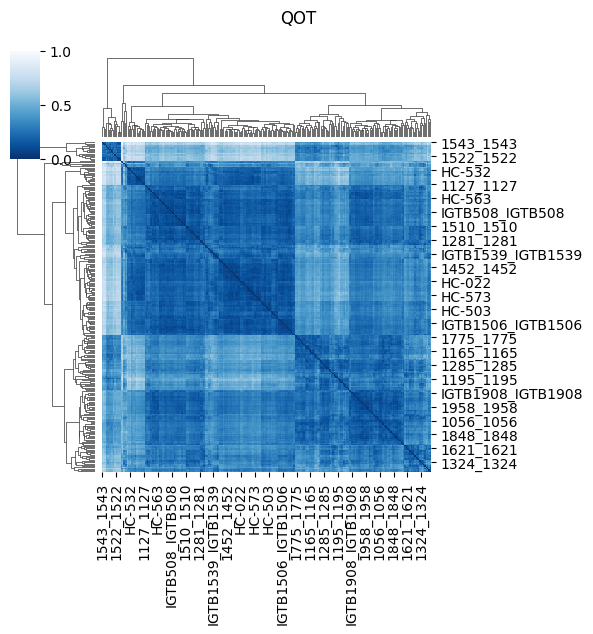

Silhouette Score: 0.16161329865918614
Silhouette Score (PILOT Version): 0.3477850612702997
Evaluation scores obtained: silhouette_score  = 0.16161329865918614, silhouette_score (PILOT) = 0.3477850612702997


In [10]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 261 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 16
  Calculated optimal t in 0.08 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.15 seconds.
Calculated PHATE in 0.28 seconds.


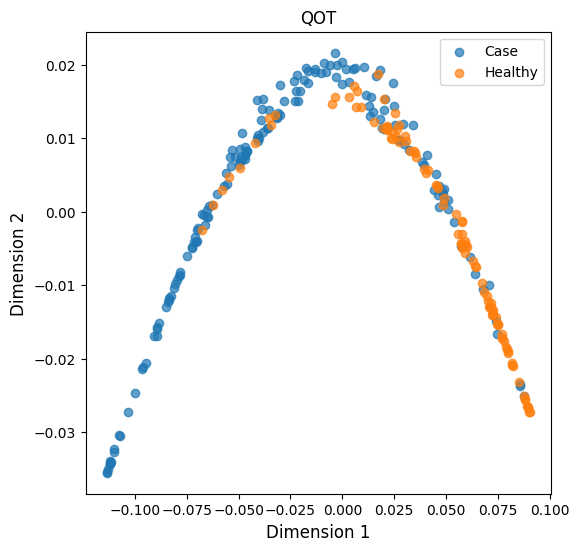

AUCPR: 0.8680289484887187
Spearman's correlation coefficient: 0.5860644272920528
P-value: 1.8119188965667212e-25


In [11]:
trajectory_analysis(adata,knn_number=20,dataset_name = 'Lupus',flip_condition=True)

# Myocardial Infarction Dataset

In [9]:
file_path = '/content/datasets/Datasets/Myocardial Infarction.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)

adata = Run_QOT(
    adata,
    gene_matrix='PCA',
    type_cell='cell_subtype',
    id_col='sampleID',
    progession='Status',
    dataset_type='rna',
    num_components_list=[5],
    random_state=2,
    min_samples_for_gmm=1,
    qot_method="exact",
    normalized_set=True
)

---Information extracted from the dataset---

---GMM completed in 64.38 seconds---

---QOT calculation completed in 6588.70 seconds---


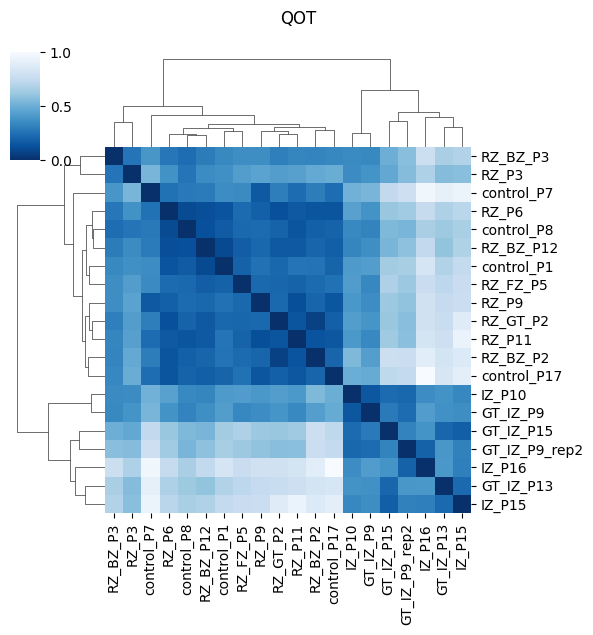

Silhouette Score: 0.5602403716813984
Silhouette Score (PILOT Version): 0.851754340742378
Evaluation scores obtained: silhouette_score  = 0.5602403716813984, silhouette_score (PILOT) = 0.851754340742378


In [10]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 20 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 7
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


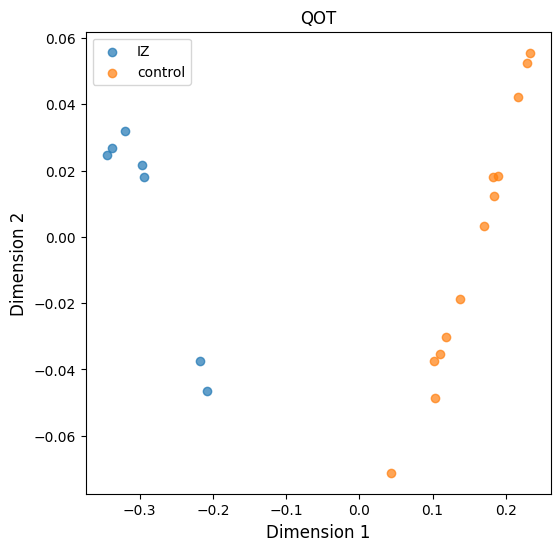

AUCPR: 1.0
Spearman's correlation coefficient: 0.8271701918685112
P-value: 6.8502951899325e-06


In [11]:
trajectory_analysis(adata,knn_number=5,dataset_name = 'MYIO',flip_condition=True)

# Covid_19_PBMC Dataset

In [5]:
file_path = '/content/datasets/Datasets/Covid_19_PBMC.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)

adata = Run_QOT(
    adata,
    gene_matrix='X_pca',
    type_cell='celltype',
    id_col='sampleID',
    progession='CoVID-19 severity',
    dataset_type='rna',
    num_components_list=[3],
    random_state=2,
    min_samples_for_gmm=1,
    qot_method="euclidean",
)

---Information extracted from the dataset---

---GMM completed in 1931.71 seconds---

---QOT calculation completed in 1001.15 seconds---


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 172 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.12 seconds.
Calculated PHATE in 0.20 seconds.


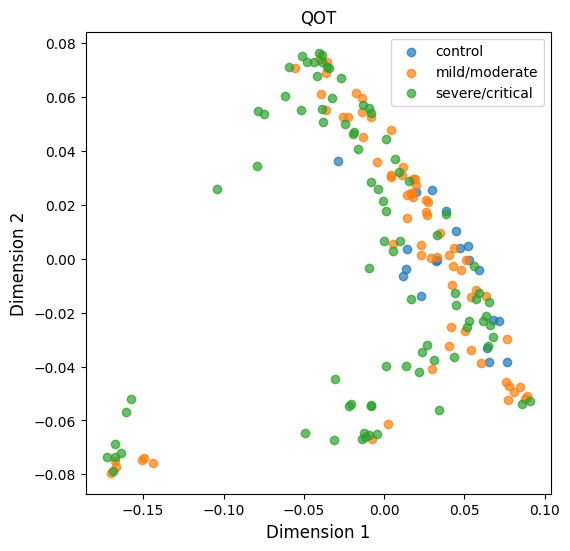

AUCPR: 0.9664988521257243
Spearman's correlation coefficient: 0.34749978505527884
P-value: 3.0036274344634805e-06


In [6]:
trajectory_analysis(adata,knn_number=9,dataset_name = 'Covid',flip_condition=True)

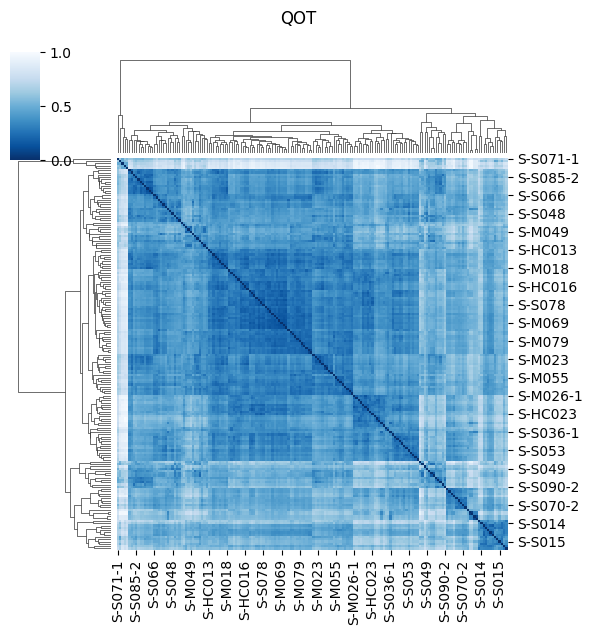

Silhouette Score: -0.08462345521463391
Silhouette Score (PILOT Version): -0.0722818415627575
Evaluation scores obtained: silhouette_score  = -0.08462345521463391, silhouette_score (PILOT) = -0.0722818415627575


In [7]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 172 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.04 seconds.
Calculated PHATE in 0.19 seconds.


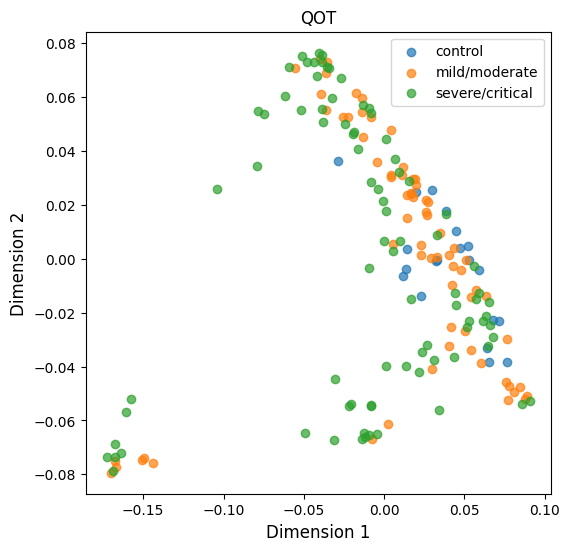

AUCPR: 0.8620819567278049
Spearman's correlation coefficient: -0.34749978505527884
P-value: 3.0036274344634805e-06


In [14]:
trajectory_analysis(adata,knn_number=9,dataset_name = 'Covid')

# follicular lymphoma Dataset

In [15]:
file_path = '/content/drive/My Drive/follicular_lymphoma.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)

adata = Run_QOT(
    adata,
    gene_matrix='X_pca',
    type_cell='cell_type',
    id_col='sample_id',
    progession='disease',
    dataset_type='rna',
    num_components_list=[1],
    random_state=2,
    min_samples_for_gmm=1,
    qot_method="exact",
)


---Information extracted from the dataset---

---GMM completed in 37.30 seconds---

---QOT calculation completed in 160.77 seconds---


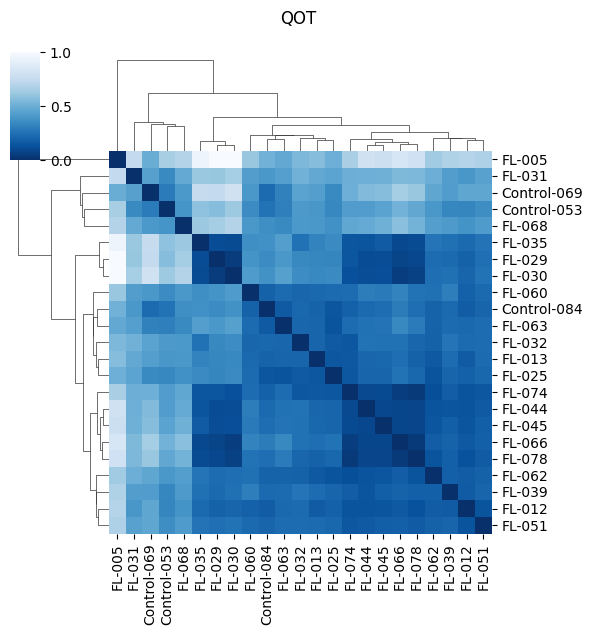

Silhouette Score: 0.24291851088128033
Silhouette Score (PILOT Version): 0.2879268843350117
Evaluation scores obtained: silhouette_score  = 0.24291851088128033, silhouette_score (PILOT) = 0.2879268843350117


In [16]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 23 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 18
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


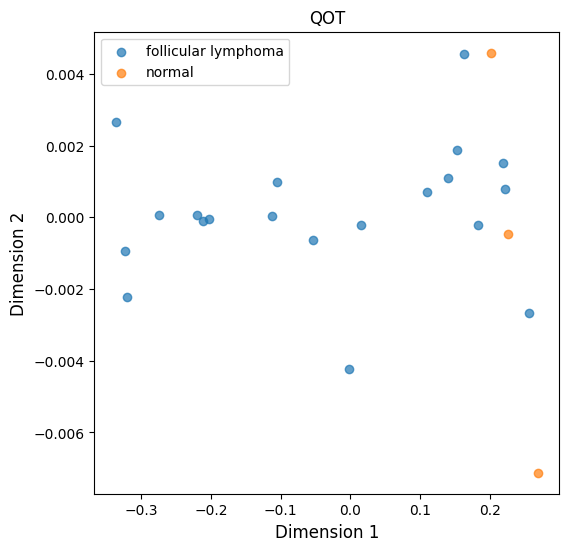

AUCPR: 0.9717391304347825
Spearman's correlation coefficient: 0.50602431370499
P-value: 0.013755540399973152


In [17]:
trajectory_analysis(adata,knn_number=6,dataset_name = 'FOLL',flip_condition=True)

# Kidney RNA

In [18]:
file_path = '/content/drive/My Drive/Kidney_rna.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)

adata = Run_QOT(
    adata,
    gene_matrix='X_pca',
    type_cell='celltype',
    id_col='donor_id',
    progession='disease',
    dataset_type='rna',
    num_components_list=[1],
    random_state=2,
    min_samples_for_gmm=1,
    qot_method="cosine",
)


---Information extracted from the dataset---

---GMM completed in 89.16 seconds---

---QOT calculation completed in 9.87 seconds---


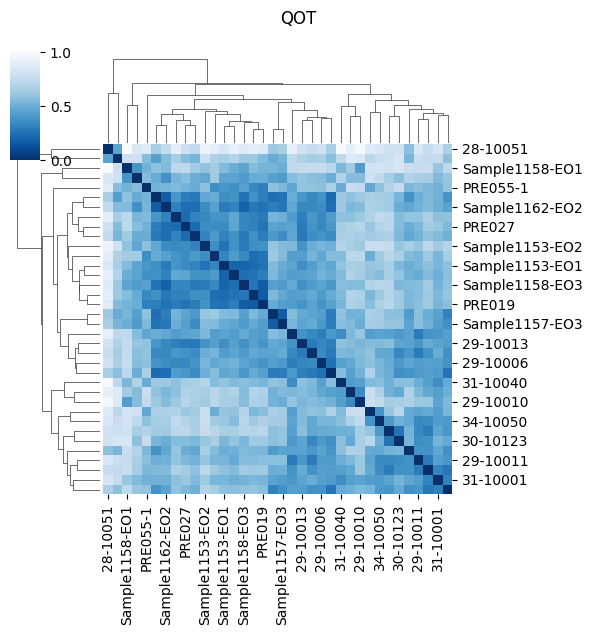

Silhouette Score: 0.1341903337812482
Silhouette Score (PILOT Version): 0.21178904432674214
Evaluation scores obtained: silhouette_score  = 0.1341903337812482, silhouette_score (PILOT) = 0.21178904432674214


In [19]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 36 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.04 seconds.


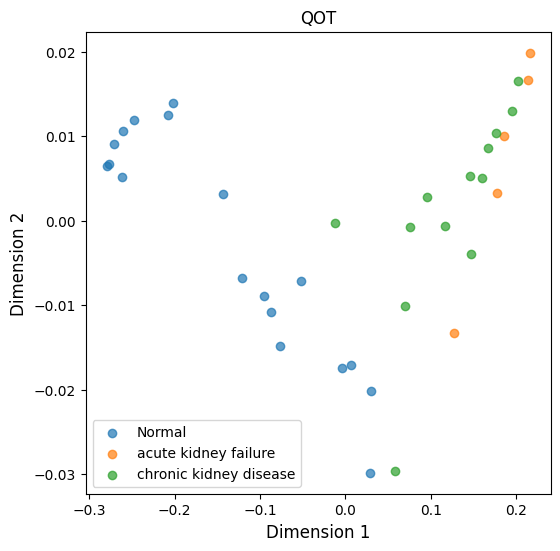

AUCPR: 0.9660493827160495
Spearman's correlation coefficient: 0.8631716757630173
P-value: 1.265208228050112e-11


In [20]:
trajectory_analysis(adata,knn_number=5,dataset_name = 'Kidney_RNA')

# Kidney_IgAN_G

In [9]:
file_path = '/content/Kidney_IgAN_G.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)

adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='Cell_type',
    id_col='sampleID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[3],
    random_state=2,
    min_samples_for_gmm=0,
    qot_method="cosine",
)


---Information extracted from the dataset---

---GMM completed in 74.73 seconds---

---QOT calculation completed in 676.58 seconds---


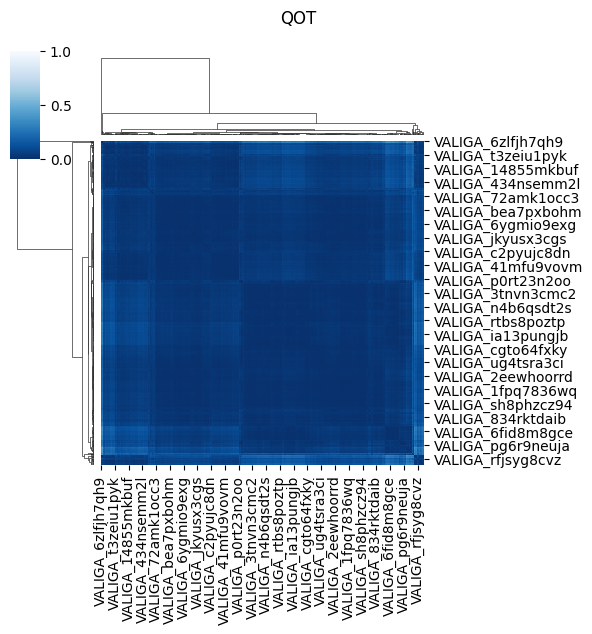

Silhouette Score: 0.14406643793340124
Silhouette Score (PILOT Version): 0.10071840314508952
Evaluation scores obtained: silhouette_score  = 0.14406643793340124, silhouette_score (PILOT) = 0.10071840314508952


In [10]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 634 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.30 seconds.
Calculated PHATE in 0.60 seconds.


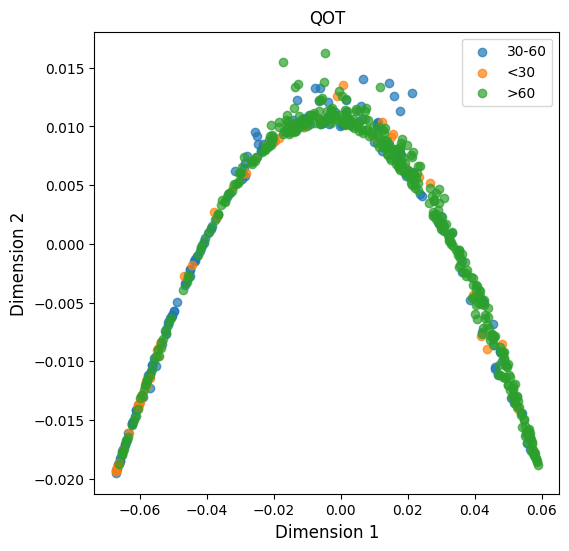

AUCPR: 0.606070193134417
Spearman's correlation coefficient: 0.3631464241768472
P-value: 3.3796628901765686e-21


In [11]:
trajectory_analysis(adata,knn_number=90,dataset_name = 'KID_G',flip_condition=True)

# Kidney_IgAN_T

In [12]:
file_path = '/content/Kidney_IgAN_T.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)

adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='Cell_type',
    id_col='sampleID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[3],
    random_state=2,
    min_samples_for_gmm=0,
    qot_method="cosine",
)


---Information extracted from the dataset---

---GMM completed in 50.60 seconds---

---QOT calculation completed in 2233.55 seconds---


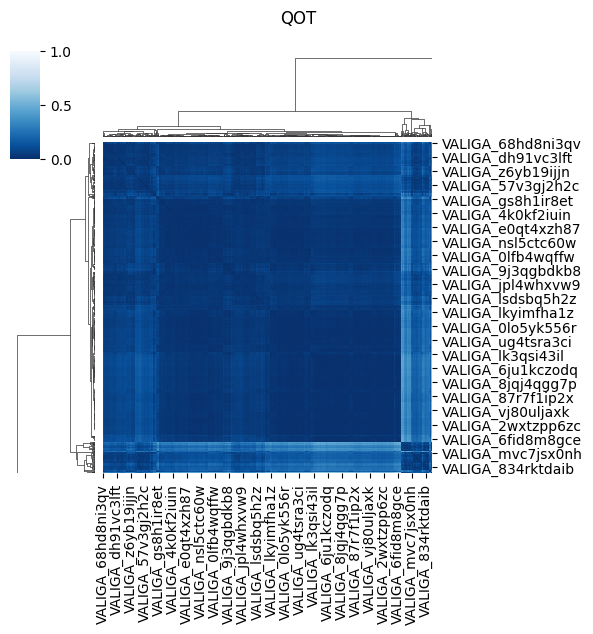

Silhouette Score: 0.15609187394529406
Silhouette Score (PILOT Version): 0.1382034022454494
Evaluation scores obtained: silhouette_score  = 0.15609187394529406, silhouette_score (PILOT) = 0.1382034022454494


In [13]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 634 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.31 seconds.
Calculated PHATE in 0.57 seconds.


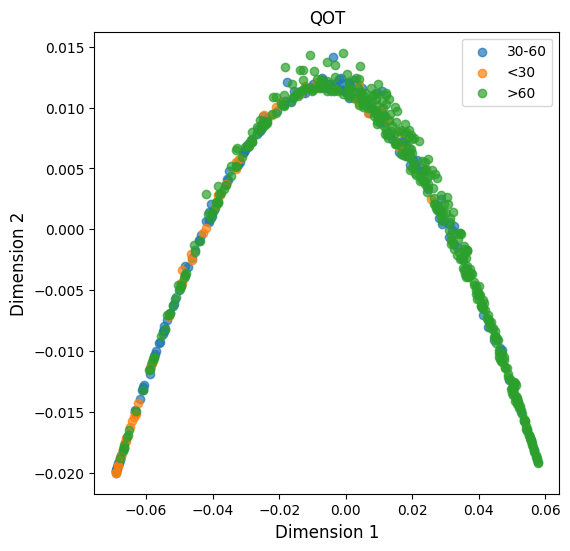

AUCPR: 0.6428228280742362
Spearman's correlation coefficient: 0.4298928404793031
P-value: 6.656322651052549e-30


In [14]:
trajectory_analysis(adata,knn_number=90,dataset_name = 'KID_T',flip_condition=True)

# Kidney_AC_G

In [15]:
file_path = '/content/Kidney_AC_G.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)
adata.X = adata.X.toarray()
adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='cell_type',
    id_col='Patient_ID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[2],
    random_state=2,
    qot_method="cosine",
)


---Information extracted from the dataset---

---GMM completed in 20.31 seconds---

---QOT calculation completed in 13.72 seconds---


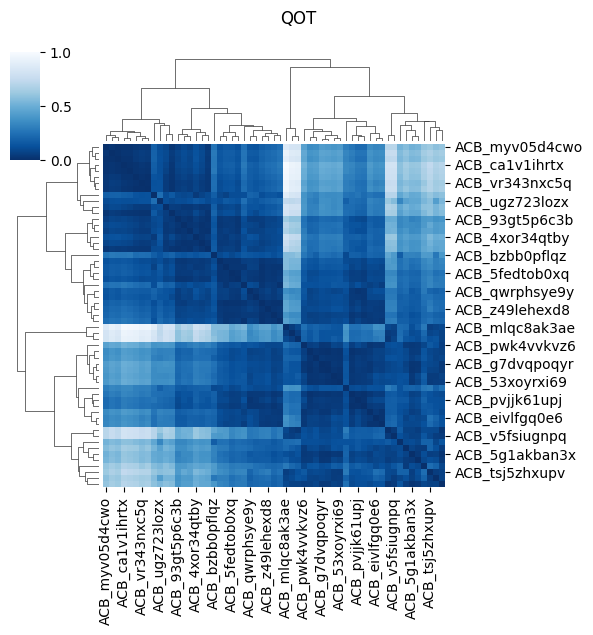

Silhouette Score: 0.33490782078287856
Silhouette Score (PILOT Version): 0.39369980924739284
Evaluation scores obtained: silhouette_score  = 0.33490782078287856, silhouette_score (PILOT) = 0.39369980924739284


In [16]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 57 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


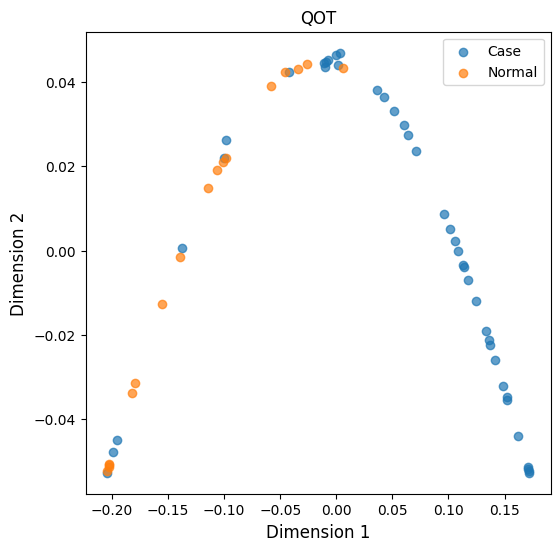

AUCPR: 0.918859649122807
Spearman's correlation coefficient: 0.6223567694022035
P-value: 2.361459290048427e-07


In [17]:
trajectory_analysis(adata,knn_number=10,dataset_name = 'Kidney_AC_G')

# Kidney_AC_T

In [18]:
file_path = '/content/Kidney_AC_T.h5ad'
# Call the processing function
adata = sc.read_h5ad(file_path)
adata.X = adata.X.toarray()
adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='cell_type',
    id_col='Patient_ID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[2],
    random_state=2,
    qot_method="cosine",
)


---Information extracted from the dataset---

---GMM completed in 4.89 seconds---

---QOT calculation completed in 4.56 seconds---


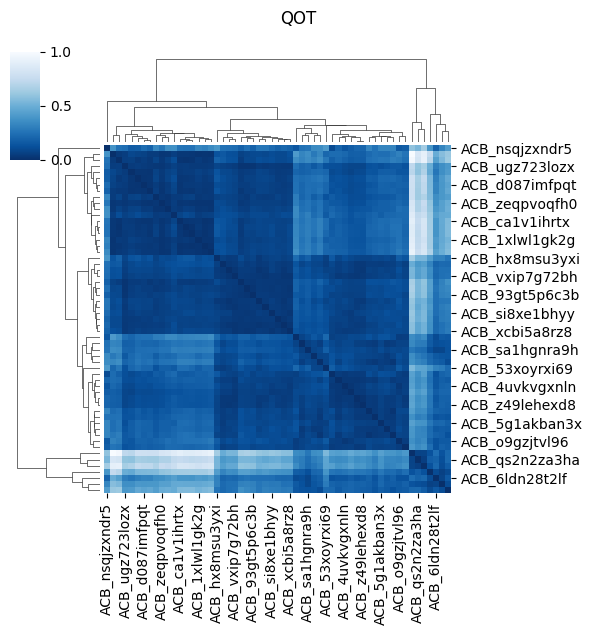

Silhouette Score: 0.154075374999704
Silhouette Score (PILOT Version): 0.1711443061456504
Evaluation scores obtained: silhouette_score  = 0.154075374999704, silhouette_score (PILOT) = 0.1711443061456504


In [19]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 57 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 13
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


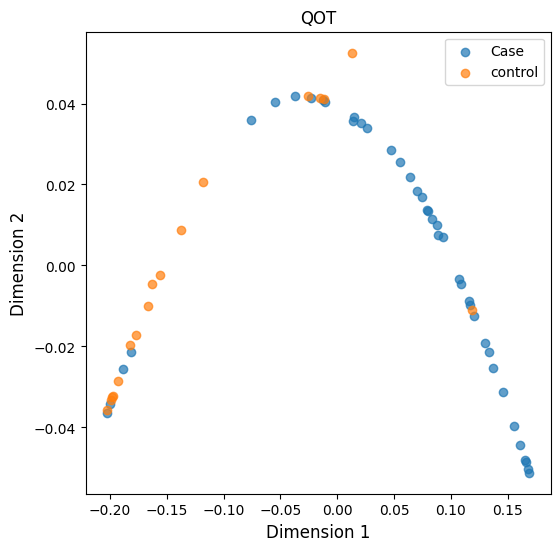

AUCPR: 0.918859649122807
Spearman's correlation coefficient: 0.5640836636529336
P-value: 4.887841541677613e-06


In [20]:
trajectory_analysis(adata,knn_number=10,dataset_name = 'Kidney_AC_T')

# Diabete

In [21]:
file_path ='/content/drive/MyDrive/diabetes_pca.h5ad'
adata = sc.read_h5ad(file_path)
adata = Run_QOT(
    adata,
    gene_matrix='X_pca',
    type_cell='cell_type',
    id_col='donor_id',
    progession='disease',
    dataset_type='rna',
    num_components_list=[1],
    min_samples_for_gmm=1,
    random_state=2,
    qot_method="cosine",
)

---Information extracted from the dataset---

---GMM completed in 83.57 seconds---

---QOT calculation completed in 14.32 seconds---


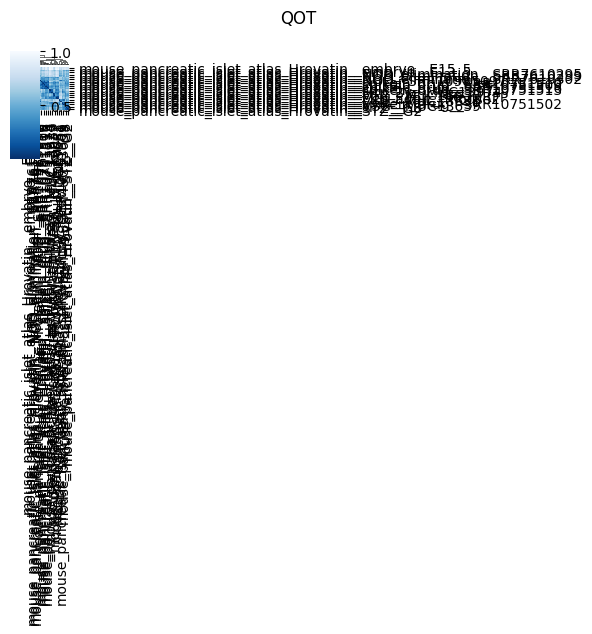

Silhouette Score: 0.1628476548178555
Silhouette Score (PILOT Version): 0.15567060504216818
Evaluation scores obtained: silhouette_score  = 0.1628476548178555, silhouette_score (PILOT) = 0.15567060504216818


In [22]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


Calculating PHATE...
  Running PHATE on precomputed distance matrix with 56 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.17 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.12 seconds.
Calculated PHATE in 0.34 seconds.


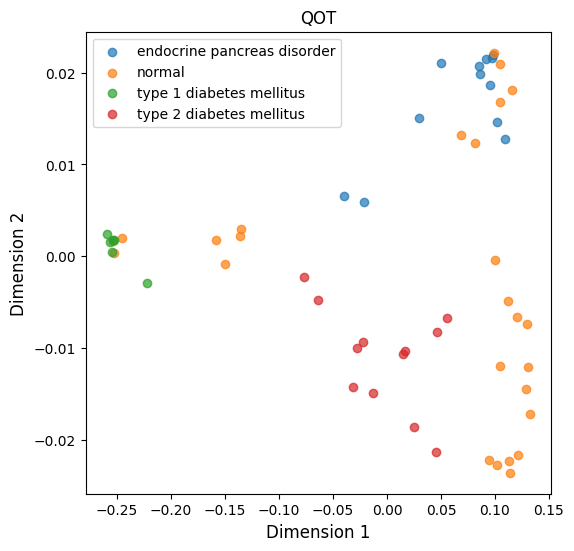

AUCPR: 0.7733730158730159
Spearman's correlation coefficient: 0.5192418470255467
P-value: 4.1240076862192736e-05


In [23]:
trajectory_analysis(adata,knn_number=10,dataset_name = 'diabete',flip_condition=True)

# Simulation Missing Celltype

In [21]:
file_path = '/content/drive/My Drive/simulate_miss_new_1.h5ad'
adata = sc.read_h5ad(file_path)
adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='Cell_type',
    id_col='sampleID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[1],
    random_state=2,
    qot_method="exact",
)

---Information extracted from the dataset---

---GMM completed in 0.34 seconds---

---QOT calculation completed in 0.34 seconds---


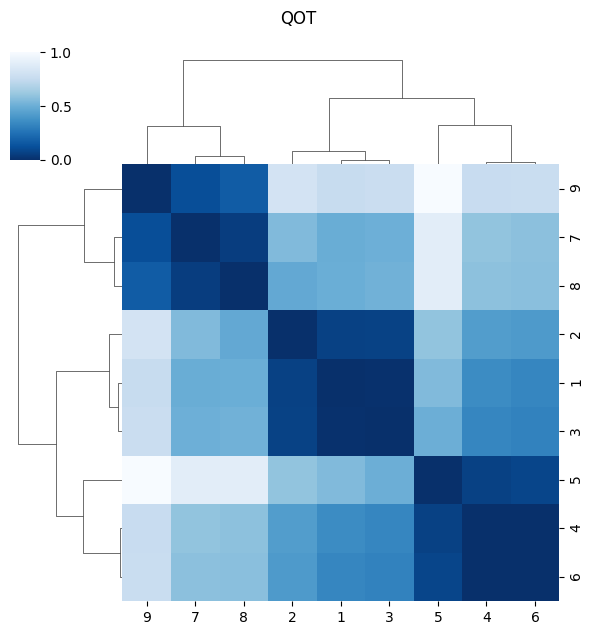

Silhouette Score: 0.8622088070845381
Silhouette Score (PILOT Version): 0.9790920034140809
Evaluation scores obtained: silhouette_score  = 0.8622088070845381, silhouette_score (PILOT) = 0.9790920034140809


In [22]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


# Simulation Uniform

In [25]:
file_path = '/content/simulate_balance_new_1 (1).h5ad'
adata = sc.read_h5ad(file_path)
adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='Cell_type',
    id_col='sampleID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[1],
    random_state=2,
    qot_method="exact",
)

---Information extracted from the dataset---

---GMM completed in 0.37 seconds---

---QOT calculation completed in 0.47 seconds---


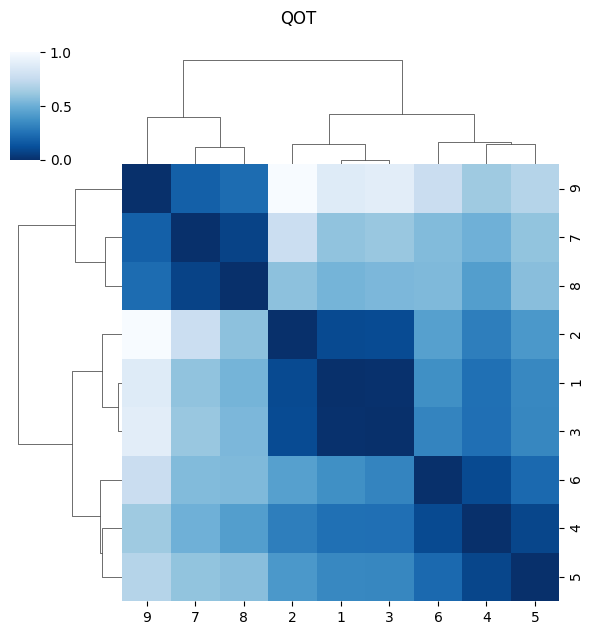

Silhouette Score: 0.7060006004941211
Silhouette Score (PILOT Version): 0.925207152933852
Evaluation scores obtained: silhouette_score  = 0.7060006004941211, silhouette_score (PILOT) = 0.925207152933852


In [26]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


# Simulation Unbalance

In [23]:
file_path = '/content/drive/My Drive/simulate_unbalance_new_1.h5ad'
adata = sc.read_h5ad(file_path)
adata = Run_QOT(
    adata,
    gene_matrix=adata.X,
    type_cell='Cell_type',
    id_col='sampleID',
    progession='status',
    dataset_type='pathomic',
    num_components_list=[9],
    random_state=2,
    qot_method="exact",
)

---Information extracted from the dataset---

---GMM completed in 1.83 seconds---

---QOT calculation completed in 34.00 seconds---


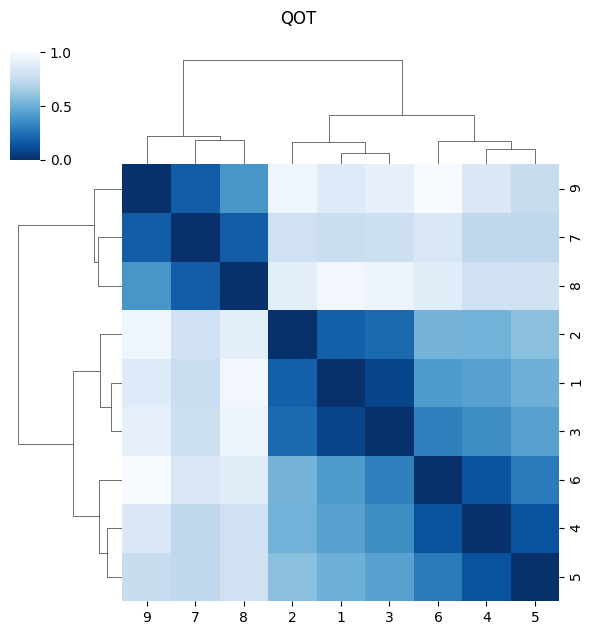

Silhouette Score: 0.645165083840601
Silhouette Score (PILOT Version): 0.8801350261017357
Evaluation scores obtained: silhouette_score  = 0.645165083840601, silhouette_score (PILOT) = 0.8801350261017357


In [24]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")
